In [58]:
import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from twitter.models import *
import parliament.models as pms

from django.db.models import Sum, Count
from django.db.models.fields import DateField
from django.db.models.functions import Cast
import textwrap as tw

In [2]:
ustats = Status.objects.values('author__screen_name').annotate(
    n = Count('pk')
)

ustats.order_by('-n')

<QuerySet [{'author__screen_name': 'EskenSaskia', 'n': 15408}, {'author__screen_name': 'RenateKuenast', 'n': 10759}, {'author__screen_name': 'MiRo_SPD', 'n': 8649}, {'author__screen_name': 'berlinliebich', 'n': 6958}, {'author__screen_name': None, 'n': 5392}, {'author__screen_name': 'GruenClaudia', 'n': 4465}, {'author__screen_name': 'BriHasselmann', 'n': 4440}, {'author__screen_name': 'StBrandner', 'n': 3914}, {'author__screen_name': 'PetrBystronAfD', 'n': 3782}, {'author__screen_name': 'AlexanderSNeu', 'n': 3317}, {'author__screen_name': 'Frank_Pasemann', 'n': 3167}, {'author__screen_name': 'th_sattelberger', 'n': 3040}, {'author__screen_name': 'KirstenTackmann', 'n': 2987}, {'author__screen_name': 'nicolabeerfdp', 'n': 2969}, {'author__screen_name': 'HHirte', 'n': 2938}, {'author__screen_name': 'Achim_P', 'n': 2835}, {'author__screen_name': 'sebast_hartmann', 'n': 2597}, {'author__screen_name': 'GabiWeberSPD', 'n': 2481}, {'author__screen_name': 'Karl_Lauterbach', 'n': 2374}, {'auth

In [3]:
Status.objects.filter(author__screen_name="EskenSaskia")

# Compare API tweets with scraped tweets
# build interface

<QuerySet [<Status: Status object (1065012500142411776)>, <Status: Status object (1065111199212363777)>, <Status: Status object (1065116861849878528)>, <Status: Status object (1065119490621485059)>, <Status: Status object (1065156838008733696)>, <Status: Status object (1065159071106572288)>, <Status: Status object (1065159472002318336)>, <Status: Status object (1065163131402498049)>, <Status: Status object (1065171972072632320)>, <Status: Status object (1065175971844816896)>, <Status: Status object (1065242649140039680)>, <Status: Status object (1064260295265271808)>, <Status: Status object (1064261131777257472)>, <Status: Status object (1064268412648636417)>, <Status: Status object (1064269279531552768)>, <Status: Status object (1064390078435348480)>, <Status: Status object (1064440923822714880)>, <Status: Status object (1064443337929891840)>, <Status: Status object (1064451804279316480)>, <Status: Status object (1064541820313616386)>, '...(remaining elements truncated)...']>

In [4]:
stats = Status.objects.annotate(
    rts = Count('retweeted_by__id')
).order_by('-rts')
stats.values('rts','text','author__screen_name')

<QuerySet [{'text': 'Claudia Roth hat in den letzten Tagen tausende Hassnachrichten von Rechten bekommen. Jetzt anwortet sie mit persönlichen Erklärung. Und mit #LiebeStattHass.  https://www.facebook.com/Roth/posts/10156190337490664\xa0… pic.twitter.com/F2JBvsDLSQ', 'author__screen_name': 'GrueneBundestag', 'rts': 22}, {'text': '1⃣5⃣.0⃣0⃣0⃣ Follower - herzlichen Dank für Ihr reges Interesse an unserer Arbeit als Oppositionsführer im #Bundestag!Folgen Sie uns JETZT auch & abonnieren Sie direkt unseren YouTube-Kanal -  verpassen Sie keine Rede mehr:➡️  https://www.youtube.com/channel/UC_dZp8bZipnjntBGLVHm6rw/about?sub_confirmation=1\xa0…#AfD #AnneWill #GroKo pic.twitter.com/LOJFpixbmL', 'author__screen_name': 'AfDimBundestag', 'rts': 17}, {'text': '1,7 Milliarden #Überstunden vernichteten im Jahr 2016 eine Million Vollzeitstellen in Deutschland. Die Folge: Gesundheit, Familie und Privatleben bleiben auf der Strecke. Deshalb: Zeitsouveränität in die Hand der Beschäftigten! Es ist 1.MAIne 

In [5]:
all_users = User.objects.all().count()
monitoring_users = User.objects.filter(monitoring=True).count()
status_count = Status.objects.all().count()
print("{} statuses by {} users in database monitoring {} accounts".format(status_count, all_users, monitoring_users))

492534 statuses by 55721 users in database monitoring 526 accounts


In [6]:
kk = TwitterSearch.objects.get(string="kohle")
print(f'{kk.status_set.all().count()} tweets for search: {kk.string}')

byday = kk.status_set.all().annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')



102619 tweets for search: kohle


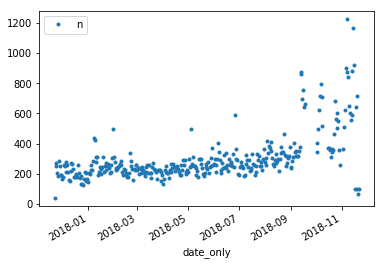

In [7]:
df = pd.DataFrame.from_dict(list(byday))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")

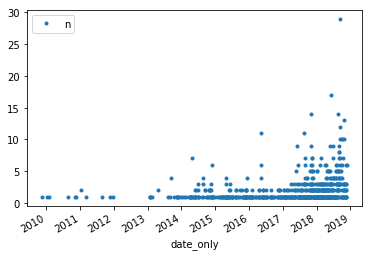

In [8]:
pp_coal = Status.objects.filter(author__monitoring=True,text__icontains="Kohle").annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

df = pd.DataFrame.from_dict(list(pp_coal))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")


In [9]:
for t in kk.status_set.filter(author__monitoring=True)[:10]:
    print(t.text)
    print(t.author.screen_name)
    print()

Dafür bauen die finnischen Freunde neue AKW. Wir schließen unsere AKW und reduzieren Schritt für Schritt Kohle. https://twitter.com/klima_allianz/status/983728466364379136 …
peteraltmaier

Heute wird die #Kohlekommission eingesetzt, jetzt muss sie auch liefern! Dafür habe ich heute zusammen mit Kolleg*innen und Umweltverbänden demonstriert.Am 24.06. folgt die große Anti-Kohle-Demo vor dem Kanzleramt. Seid alle dabei! #endcoal pic.twitter.com/VPBsfn9BpA
Ingrid_Nestle

"Kohle in der Lausitz und China-Tech in Thüringen – sieht so die Wirtschaftspolitik der Zukunft aus?" - Für die @StiftungEnergie habe ich meine Gedanken zur #Kohlekommission ín einem Gastbeitrag aufgeschrieben. https://bit.ly/2Lx5bUS 
Ingrid_Nestle

Frisch aus dem #Bundestag: @cducsubt durch die @GrueneBundestag gekapert. Merkelfraktion will 2040/2050 aus der Kohle aussteigen... Darum nur noch #AfD
SteffenKotre

So funtioniert die #Energiewende:  erneuerbaren Energien funktionieren nur mit Öl, Gas und Kohle. Damit bezahlen

In [10]:
for t in kk.status_set.values('text')[:10]:
    print(t)
    print()

{'text': 'Heute 18:30 vor dem Berliner RWE Lobbybüro Kundgebung "Kohle tötet - #Hambi leibt!" als Support für #AktionUnterholz. Kommt zahlreich!'}

{'text': 'Noch während die Kohle-Kommission über den Ausstieg verhandelt sägt RWE am #Klimaschutz & will den #HambacherWald weiter für #Kohle & Profit abholzen. So nicht! Protestiere mit uns ▼▼▼  https://aktion.bund.net/hambacher-wald-retten-statt-roden?refsid=836933\xa0…'}

{'text': '@gruenenrw @fbkgalaxy @Westpol @maddinespunkt Wobei man keine Kohle mehr braucht ,außer man will ein paar Cavemen die Umwelt verschmutzen lassen und Menschen krankmachn. Was ist das Verlangen von diesen Neandertalern Dreck zu verbrennen? Koennen die Nix anderes um Kohle zu machen....?'}

{'text': '@tp_1024 @quantenwelt Es ist besonders interessant, da ja ein frühes Argument der Kernkraftgegner war: die machen ja nur Strom keine Fernwärme wie die damals noch saubere Kohle. Wobei das ja eine Designentscheidung war.'}

{'text': 'Noch während die Kohle-Kommission 

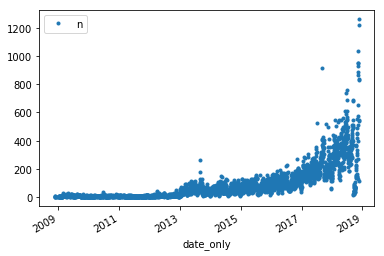

In [11]:
byday = Status.objects.filter(author__monitoring=True).annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

df = pd.DataFrame.from_dict(list(byday))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")

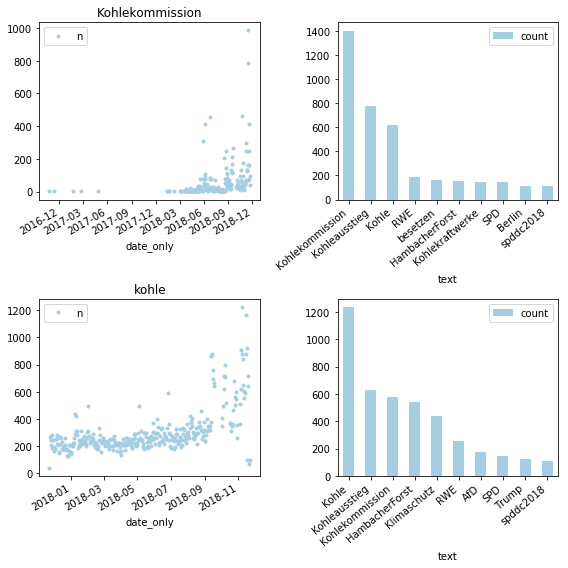

In [12]:
plt.close()
fig = plt.figure(figsize=(12,12))

searches = TwitterSearch.objects.all()

fig, axs = plt.subplots(searches.count(),2,figsize=(8,8))

for i, ts in enumerate(TwitterSearch.objects.all()):
    byday = ts.status_set.all().annotate(
        date_only=Cast('created_at', DateField())
    ).values('date_only').annotate(
        n = Count('pk')
    ).order_by('date_only')

    df = pd.DataFrame.from_dict(list(byday))
    df['date_only'] = pd.to_datetime(df['date_only'])

    #if i > 1:
    #    ax = fig.add_subplot(1,2,i+1,sharex=ax)
    #else:
    #    ax = fig.add_subplot(1,2,i+1)
    #
    
    ax = axs[i,0]
    ax.set_title(ts.string)
    
    df.plot('date_only','n', style=".",colormap='Paired', ax = ax)

    hts = []
    for s in ts.status_set.filter(entities__hashtags__iregex='\w'):
        for hashtag in s.entities['hashtags']:
            try:
                ht = [x for x in hts if x['text']==hashtag['text']][0]
                ht['count']+=1
            except:
                ht = {"text": hashtag["text"], "count": 1}
                hts.append(ht) 
    
    #print(ht_df.sort_values('count',ascending=False).head(20))
    ax = axs[i,1]
    ht_df = df.from_dict(hts)
    ht_df = ht_df.sort_values('count',ascending=False).head(10)
    ht_df.plot.bar('text','count',colormap='Paired',ax = ax)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels,rotation=40,ha="right")
    
fig.tight_layout()
plt.show()

In [13]:
ax.get_xticklabels()

<a list of 10 Text xticklabel objects>

CDUCSU
SPD
LINKE
FDP
AFD
GRUENE


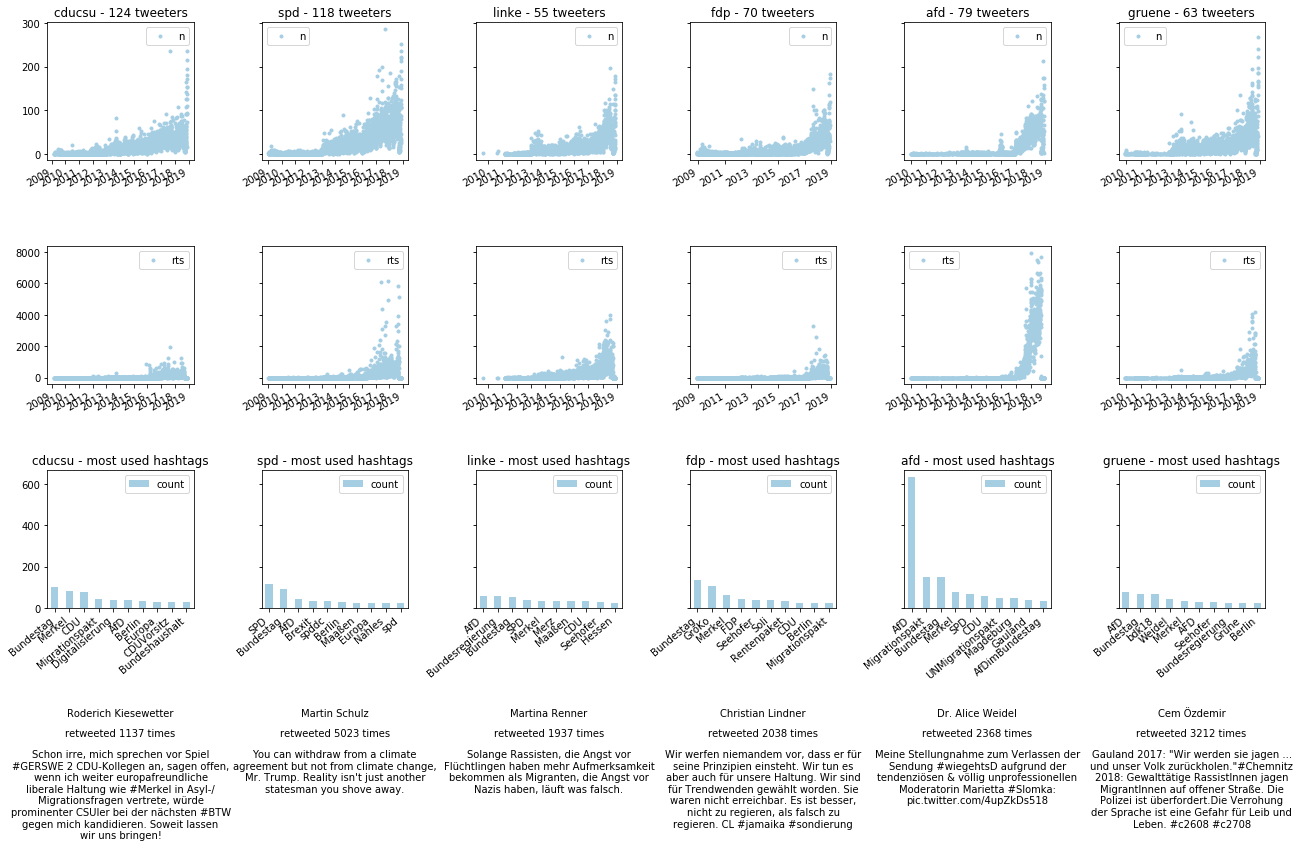

In [80]:
plt.close()
fig = plt.figure(figsize=(18,24))

searches = TwitterSearch.objects.all()

parties = pms.Party.objects.filter(name__in=['cducsu','spd','linke','fdp','afd','gruene'])

fig, axs = plt.subplots(4,parties.count(),figsize=(18,12), sharey='row')

for i, party in enumerate(parties):
    
    users = User.objects.filter(person__party=party)
    
    statuses = Status.objects.filter(
        author__person__party=party
    )
    print(party)
    byday = statuses.annotate(
        date_only=Cast('created_at', DateField())
    ).values('date_only').annotate(
        n = Count('pk'),
        rts = Sum('retweets_count')
    ).order_by('date_only')

    df = pd.DataFrame.from_dict(list(byday))
    df['date_only'] = pd.to_datetime(df['date_only'])
    
    ax = axs[0,i]
    ax.set_title(f"{party.name} - {users.count()} tweeters")
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    df.plot('date_only','n', style=".",colormap='Paired', ax = ax)
    
    ax = axs[1,i]
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    df.plot('date_only','rts', style=".",colormap='Paired', ax = ax)

    hts = []
    for s in statuses.filter(entities__hashtags__iregex='\w'):
        for hashtag in s.entities['hashtags']:
            try:
                ht = [x for x in hts if x['text']==hashtag['text']][0]
                ht['count']+=1
            except:
                ht = {"text": hashtag["text"], "count": 1}
                hts.append(ht) 
    
    #print(ht_df.sort_values('count',ascending=False).head(20))
    ax = axs[2,i]
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ht_df = df.from_dict(hts)
    ht_df = ht_df.sort_values('count',ascending=False).head(10)
    ht_df.plot.bar('text','count',colormap='Paired',ax = ax)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels,rotation=40,ha="right")
    ax.set_title(f"{party.name} - most used hashtags")
    
    most_retweeted = statuses.order_by('-retweets_count').first()
    ax = axs[3,i]
    ax.text(
        0.5,
        0.9,
        tw.fill(tw.dedent(most_retweeted.author.person.__str__()),width=40),
        ha="center",
        va="top"
    )
    ax.text(
        0.5,
        0.75,
        tw.fill(tw.dedent(f"retweeted {most_retweeted.retweets_count} times"),width=40),
        ha="center",
        va="top"
    )
    ax.text(
        0.5,
        0.6,
        tw.fill(tw.dedent(most_retweeted.text),width=40),
        ha="center",
        va="top"
    )
    ax.grid(False)
    ax.axis('off')
    
    
fig.tight_layout()
plt.show()

In [43]:
Status.objects.first().__dict__

{'_state': <django.db.models.base.ModelState at 0x7fd0fe98e5c0>,
 'api_got': False,
 'author_id': 17535941,
 'contributors': None,
 'coordinates': None,
 'created_at': datetime.datetime(2008, 11, 21, 13, 40, 52, tzinfo=<UTC>),
 'entities': None,
 'favorited': False,
 'favorites_count': 0,
 'fetched': datetime.datetime(2018, 9, 14, 16, 37, 48, 352748, tzinfo=<UTC>),
 'geo': None,
 'id': 1016464001,
 'in_reply_to_status_id': None,
 'in_reply_to_user_id': None,
 'lang': None,
 'place': '',
 'replies_count': 0,
 'retweeted': False,
 'retweeted_status_id': None,
 'retweets_count': 0,
 'scrape_got': False,
 'source': None,
 'source_url': None,
 'text': 'ist jetzt neu bei Twitter.',
 'truncated': False,
 'twitterbasemodel_ptr_id': 1016464001}